<a href="https://colab.research.google.com/github/Mohitag94/Instance_Segmentation/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing relevant modules.

In [1]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO  # API for COCO dataset.
import skimage.io as io

%matplotlib inline

In [2]:
ROOT_DATASET_DIR = r"D:\MScDataScience\9.Research_Methods\Assignment\Assignment1\RM_Segmentation_Assignment_dataset"
# Define location of training data (images and labels).
train_data_path = os.path.join(ROOT_DATASET_DIR, "train-300")
train_annotation_file = os.path.join(train_data_path, "labels.json")

# Define location of validation data (images and labels).
val_data_path = os.path.join(ROOT_DATASET_DIR, "validation-300")
val_annotation_file = os.path.join(val_data_path, "labels.json")

In [3]:
# Initialising COCO API for instance annotations.
train_coco = COCO(train_annotation_file)
val_coco = COCO(val_annotation_file)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [4]:
traget_classes = ["cake", "car", "dog", "person"]
train_cat_IDs = train_coco.getCatIds(catNms=traget_classes)

print(train_cat_IDs)

train_cat_name = train_coco.loadCats(train_cat_IDs)
print(train_cat_name)

[15, 16, 25, 41]
[{'id': 15, 'name': 'cake', 'supercategory': 'food'}, {'id': 16, 'name': 'car', 'supercategory': 'vehicle'}, {'id': 25, 'name': 'dog', 'supercategory': 'animal'}, {'id': 41, 'name': 'person', 'supercategory': 'person'}]


In [5]:
train_image_IDs = []

for i, id in enumerate(train_cat_IDs):
    if train_cat_name[i]["id"] == id:
        name = train_cat_name[i]["name"]
    image_IDs = train_coco.getImgIds(catIds=train_cat_IDs[i])
    print(name, "-->length-----", len(image_IDs))
    print(image_IDs)
    train_image_IDs += image_IDs
    # train_image_IDs += train_coco.getImgIds(catIds=train_cat_IDs[i])

cake -->length----- 1
[240]
car -->length----- 283
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 2

In [6]:
train_unique_img_IDs = list(set(train_image_IDs))

In [7]:
tragets = {}
# for i, traget in enumerate(train_cat_name):
#     if traget["name"] == traget_classes[i]:
#         tragets[traget["name"]] = traget["id"]

tragets.update({traget["id"]: traget["name"] for i, traget in enumerate(
    train_cat_name) if traget["name"] == traget_classes[i]})

In [8]:
tragets

{15: 'cake', 16: 'car', 25: 'dog', 41: 'person'}

# Display Images in a Grid

In [9]:
def display_images_grid(image_folder, grid_size=(4, 8), figsize=(20, 10)):
    """
    Display images from a folder in a grid layout.

    Parameters:
    - image_folder: Path to the folder containing images
    - grid_size: Tuple (rows, cols) defining the grid dimensions
    - figsize: Figure size (width, height) in inches
    """
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(
        image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Calculate the number of images to display based on grid size
    num_images = min(grid_size[0] * grid_size[1], len(image_files))

    # Create figure and subplots
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figsize)
    axes = axes.flatten()

    # Display images in the grid
    for i in range(num_images):
        img_path = os.path.join(image_folder, image_files[i])
        img = io.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"Image {i+1}: {image_files[i]}", fontsize=8)
        axes[i].axis('off')

    # Hide any unused subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
# Display images from the test-30 folder in a grid
test_folder = os.path.join(ROOT_DATASET_DIR, "test-30")
# display_images_grid(test_folder, grid_size=(4, 8), figsize=(20, 15))

# Display Images from Other Folders

In [11]:
# Display images from the train-300/data folder
train_folder = os.path.join(ROOT_DATASET_DIR, "train-300", "data")
# Uncomment the line below to display train images
# display_images_grid(train_folder, grid_size=(5, 6), figsize=(20, 15))

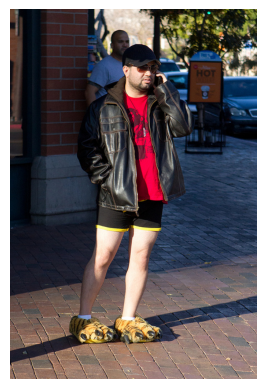

In [12]:
im = io.imread(os.path.join(train_folder, train_coco.loadImgs(
    train_unique_img_IDs[11])[0]["file_name"]))


plt.imshow(im)


plt.axis('off')


plt.show()

In [13]:
ann_id = train_coco.getAnnIds(imgIds=train_coco.loadImgs(
    train_unique_img_IDs)[11]["id"], catIds=train_cat_IDs)


ann = train_coco.loadAnns(ann_id)


print(len(ann))

5


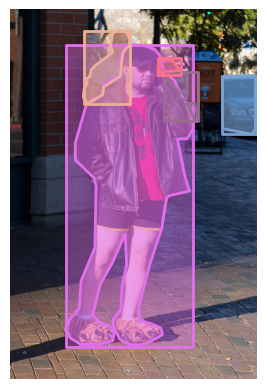

In [14]:
plt.imshow(im)
plt.axis("off")

train_coco.showAnns(ann, draw_bbox=True)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision
from torchvision import transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

In [16]:
# get all the filter images id from dataset
# get all box
# get all mask
# get all labels
id = image_IDs[11]
ann_id = train_coco.getAnnIds(imgIds=id, catIds=train_cat_IDs)
anns = train_coco.loadAnns(ann_id)

segemantation mask is in ploygon format which needs to be converted into binary mask for training and ploting

In [17]:
for ann in anns:
    print(ann["bbox"])
    print(ann["segmentation"])
    print(train_coco.annToMask(ann))

    print(ann["category_id"], ":", tragets[ann["category_id"]])
    # get category name using tragets
    print(ann["image_id"])

[96.58, 61.98, 220.54, 521.8]
[[218.0, 582.5, 196.0, 575.5, 189.0, 569.5, 178.5, 548.0, 178.5, 536.0, 191.5, 518.0, 193.5, 480.0, 201.5, 442.0, 199.0, 388.5, 176.5, 439.0, 155.5, 476.0, 142.5, 529.0, 155.0, 541.5, 176.5, 550.0, 180.5, 558.0, 177.5, 573.0, 152.0, 579.5, 122.0, 579.5, 104.0, 568.5, 95.5, 553.0, 102.5, 537.0, 119.5, 516.0, 122.5, 470.0, 146.5, 412.0, 148.5, 306.0, 145.5, 292.0, 112.5, 260.0, 112.5, 231.0, 132.5, 161.0, 159.0, 147.5, 162.5, 129.0, 190.5, 112.0, 190.5, 79.0, 199.0, 64.5, 213.0, 60.5, 233.0, 62.5, 250.0, 68.5, 259.5, 80.0, 265.5, 106.0, 284.5, 123.0, 294.5, 146.0, 306.5, 164.0, 313.5, 182.0, 316.5, 201.0, 316.5, 207.0, 306.0, 223.5, 289.5, 224.0, 302.5, 289.0, 310.5, 314.0, 274.0, 322.5, 270.5, 327.0, 262.5, 378.0, 241.5, 441.0, 222.5, 515.0, 224.5, 539.0, 244.0, 543.5, 261.0, 551.5, 263.5, 563.0, 239.0, 576.5, 218.0, 582.5]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
41 : person
12

In [18]:
# infering one image on mrcnn model
model = maskrcnn_resnet50_fpn(pretrained=True)
# # Replace the classifier
# in_features = model.roi_heads.box_predictor.cls_score.in_features
# model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 5)  # Assuming 5 classes including background

# # Replace the mask predictor
# in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
# hidden_layer = 256
# model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, 5)

c:\Users\agarw\Pyhton_VENV\instance_seg_venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\agarw\Pyhton_VENV\instance_seg_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
model.eval()
model.to(device)

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [21]:
import cv2
image_path = os.path.join(train_folder, train_coco.loadImgs(
    train_unique_img_IDs[11])[0]["file_name"])
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_tensor = torch.from_numpy(image_rgb).permute(2, 0, 1).float() / 255.0
image_tensor = image_tensor.unsqueeze(0).to(device)

In [22]:
with torch.no_grad():
    predictions = model(image_tensor)

In [23]:
# Process predictions
pred = predictions[0]
boxes = pred['boxes'].cpu().numpy()
scores = pred['scores'].cpu().numpy()
labels = pred['labels'].cpu().numpy()
masks = pred['masks'].cpu().numpy()

# Filter by confidence threshold
conf_threshold = 0.7
high_conf_indices = scores >= conf_threshold

print(scores, "\n", labels)
print(len(labels))
print(np.mean(scores))

[0.99908555 0.9902692  0.98446506 0.9510749  0.9102872  0.8891856
 0.87522006 0.79730004 0.711664   0.64370203 0.49898568 0.4354452
 0.4335937  0.37126842 0.32611442 0.28423008 0.25607663 0.24658513
 0.24232563 0.19583857 0.16228443 0.1566624  0.1556647  0.13103661
 0.12539397 0.12052786 0.11916161 0.11900841 0.10384473 0.09635774
 0.09393833 0.07914512 0.07905705 0.07588076 0.07453866 0.06587825
 0.06363221 0.05715209 0.05677817 0.05546923] 
 [ 1  1  3 77  3 77  3  3  3 31 14 27 77 27  1 27 77  3  3  3 31  1  3 40
 31 27  3 10  8 27  3 84  1 31 14  3 84  3 27 77]
40
0.35085326


In [24]:
high_conf_indices

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [25]:
mask = train_coco.annToMask(anns[0])
for i in range(1, len(anns)):
    mask += train_coco.annToMask(anns[i])

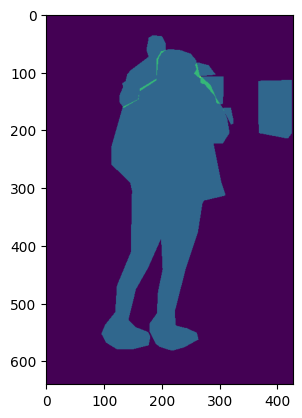

In [26]:
plt.imshow(mask)

In [27]:
len(anns)

5

In [28]:
from skimage.transform import resize

(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

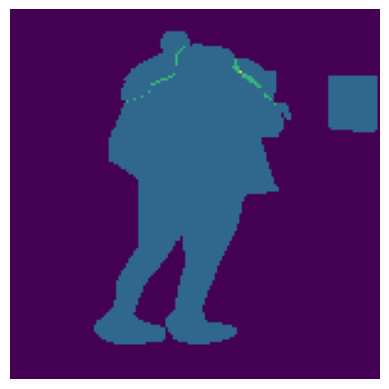

In [29]:
plt.imshow(resize(mask, (150, 150), order=0,
           preserve_range=True, anti_aliasing=False))
plt.axis("off")

In [30]:
import matplotlib.patches as patches

In [31]:
train_cat_IDs
colors = plt.cm.rainbow(np.linspace(0, 1, len(tragets)))
color_dict = {id: colors[i] for i, id in enumerate(tragets)}

In [32]:
color_dict

{15: array([0.5, 0. , 1. , 1. ]),
 16: array([0.16666667, 0.8660254 , 0.8660254 , 1.        ]),
 25: array([0.83333333, 0.8660254 , 0.5       , 1.        ]),
 41: array([1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00])}

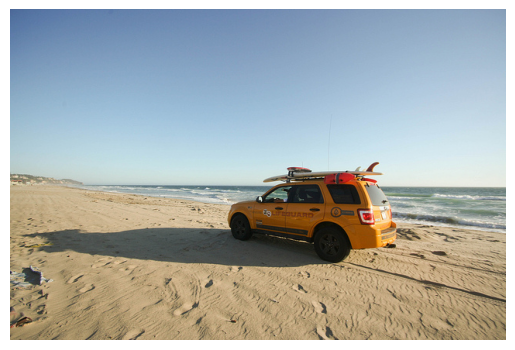

In [33]:
# get all the filter images id from dataset
# get all box
# get all mask
# get all labels
id = 100
im = io.imread(os.path.join(train_folder, train_coco.loadImgs(
    train_unique_img_IDs[id])[0]["file_name"]))
plt.imshow(im)
plt.axis('off')
plt.show()
ann_id = train_coco.getAnnIds(
    imgIds=train_unique_img_IDs[id], catIds=train_cat_IDs)
anns = train_coco.loadAnns(ann_id)

(np.float64(-0.5), np.float64(639.5), np.float64(426.5), np.float64(-0.5))

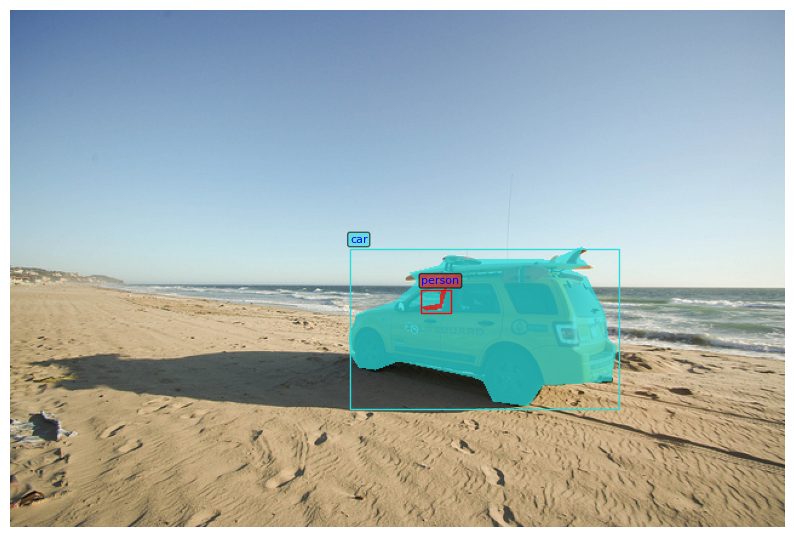

In [34]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(im)
for i, ann in enumerate(anns):
    color = color_dict[anns[i]["category_id"]]
    # Create a Rectangle patch
    rect = patches.Rectangle((ann["bbox"][0], ann["bbox"][1]), ann
                             ["bbox"][2], ann["bbox"][3], linewidth=1, edgecolor=color, facecolor='none')

    # Add the patch to the Axes
    plt.gca().add_patch(rect)
    # add labels
    plt.text(ann["bbox"][0], ann["bbox"][1]-5,
             tragets[anns[i]["category_id"]], color="blue", fontsize=8,
             bbox=dict(facecolor=color, alpha=0.6, boxstyle="round", pad=0.2))

    # adding mask
    mask = train_coco.annToMask(ann)
    # colored masked
    colored_masked = np.zeros((mask.shape[0], mask.shape[1], 4))
    colored_masked[:, :, 0] = color[0]
    colored_masked[:, :, 1] = color[1]
    colored_masked[:, :, 2] = color[2]
    colored_masked[:, :, 3] = mask * 0.75
    plt.imshow(colored_masked)


plt.axis("off")

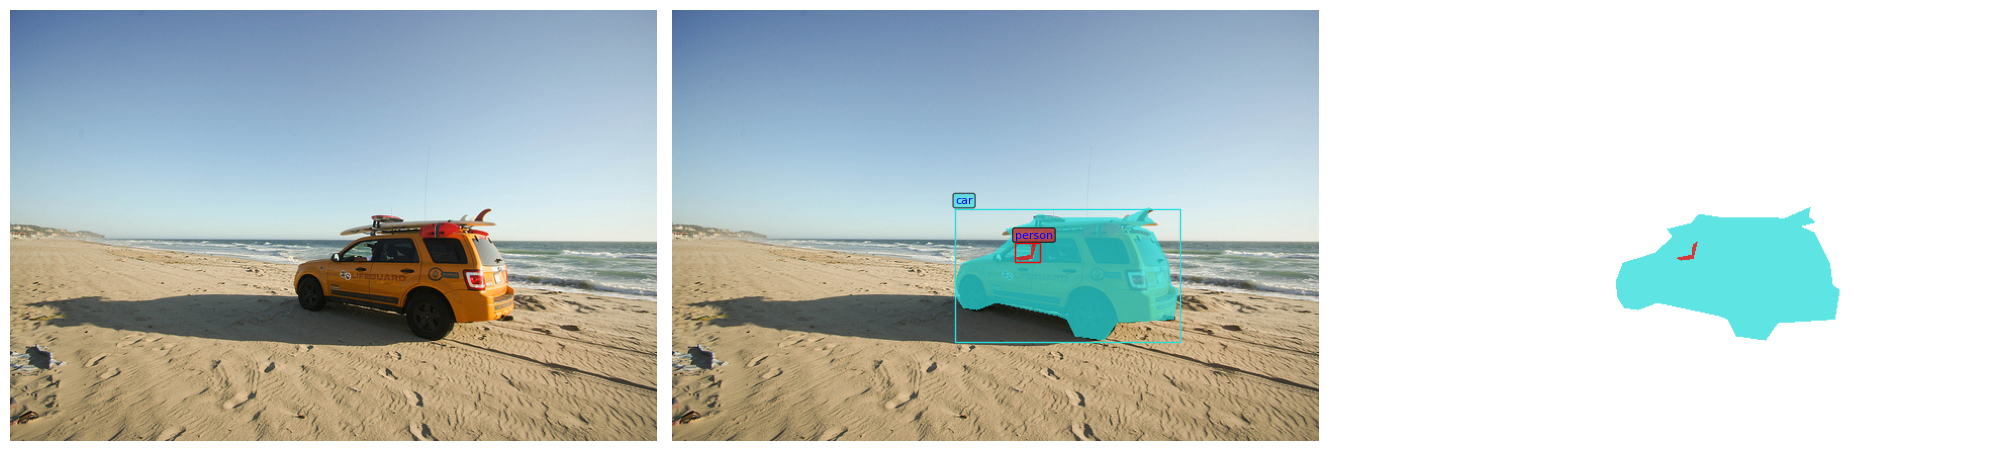

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(im)
ax[0].axis("off")


ax[1].imshow(im)
for i, ann in enumerate(anns):
    color = color_dict[anns[i]["category_id"]]
    # Create a Rectangle patch
    rect = patches.Rectangle((ann["bbox"][0], ann["bbox"][1]), ann
                             ["bbox"][2], ann["bbox"][3], linewidth=1, edgecolor=color, facecolor='none')

    # Add the patch to the Axes
    ax[1].add_patch(rect)
    # add labels
    ax[1].text(ann["bbox"][0], ann["bbox"][1]-5,
               tragets[anns[i]["category_id"]], color="blue", fontsize=8,
               bbox=dict(facecolor=color, alpha=0.6, boxstyle="round", pad=0.2))

    # adding mask
    mask = train_coco.annToMask(ann)
    # colored masked
    colored_masked = np.zeros((mask.shape[0], mask.shape[1], 4))
    colored_masked[:, :, 0] = color[0]
    colored_masked[:, :, 1] = color[1]
    colored_masked[:, :, 2] = color[2]
    colored_masked[:, :, 3] = mask * 0.75
    ax[1].imshow(colored_masked)

    # colored masked
    colored_masked_only = np.zeros((mask.shape[0], mask.shape[1], 4))
    colored_masked_only[:, :, 0] = color[0]
    colored_masked_only[:, :, 1] = color[1]
    colored_masked_only[:, :, 2] = color[2]
    colored_masked_only[:, :, 3] = mask * 0.75
    # add a background to mask
    ax[2].imshow(colored_masked_only)
    ax[2].set_facecolor("grey")


ax[1].axis("off")
ax[2].axis("off")

plt.tight_layout()
plt.show()

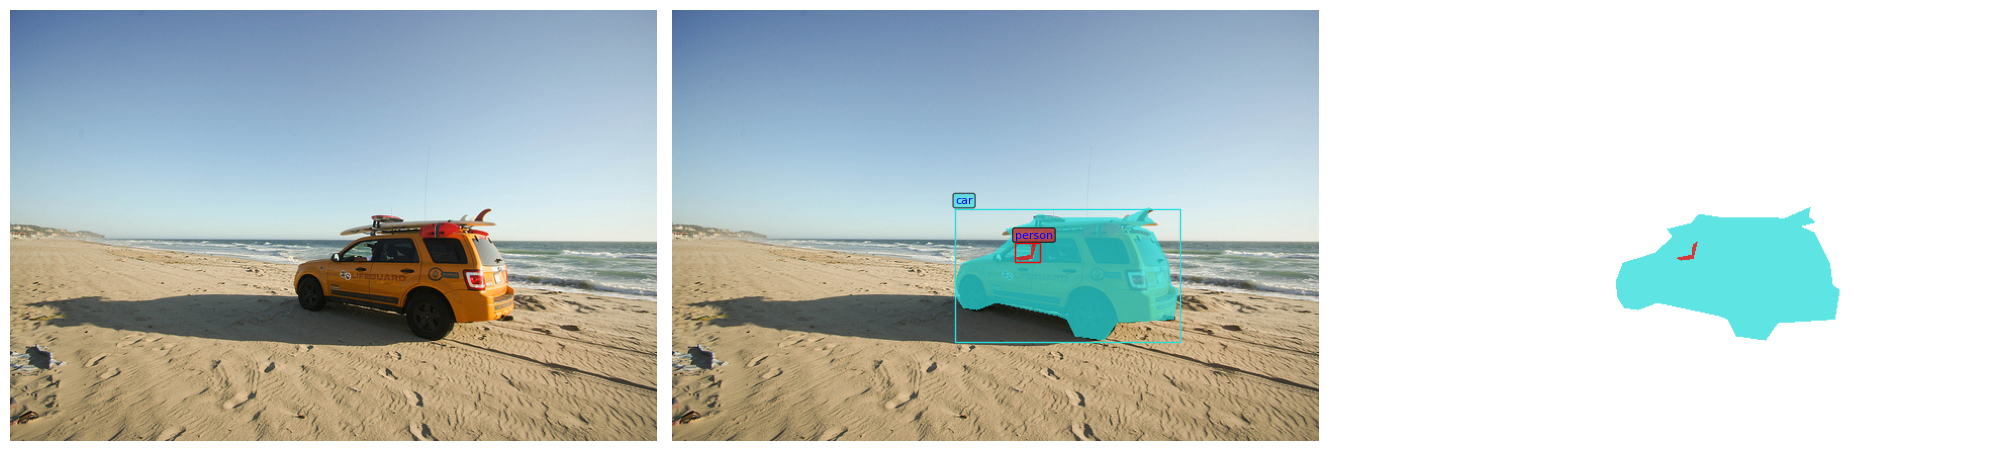

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(im)
ax[0].axis("off")

instance_mask = np.ones((im.shape[0], im.shape[1], 4))
ax[2].imshow(instance_mask)
ax[1].imshow(im)
for i, ann in enumerate(anns):
    color = color_dict[anns[i]["category_id"]]
    # Create a Rectangle patch
    rect = patches.Rectangle((ann["bbox"][0], ann["bbox"][1]), ann
                             ["bbox"][2], ann["bbox"][3], linewidth=1, edgecolor=color, facecolor='none')

    # Add the patch to the Axes
    ax[1].add_patch(rect)
    # add labels
    ax[1].text(ann["bbox"][0], ann["bbox"][1]-5,
               tragets[anns[i]["category_id"]], color="blue", fontsize=8,
               bbox=dict(facecolor=color, alpha=0.6, boxstyle="round", pad=0.2))

    # adding mask
    mask = train_coco.annToMask(ann)
    # colored masked
    colored_masked = np.zeros((mask.shape[0], mask.shape[1], 4))
    colored_masked[:, :, 0] = color[0]
    colored_masked[:, :, 1] = color[1]
    colored_masked[:, :, 2] = color[2]
    colored_masked[:, :, 3] = mask * 0.75
    ax[1].imshow(colored_masked)

    # colored masked
    colored_masked_only = np.zeros((mask.shape[0], mask.shape[1], 4))
    colored_masked_only[:, :, 0] = color[0]
    colored_masked_only[:, :, 1] = color[1]
    colored_masked_only[:, :, 2] = color[2]
    colored_masked_only[:, :, 3] = mask * 0.75
    # add a background to mask
    ax[2].imshow(colored_masked_only)
    ax[2].set_facecolor("grey")


ax[1].axis("off")
ax[2].axis("off")

plt.tight_layout()
plt.show()